**Calvin Pitney - 114198709**

In [ ]:
# Import Data
import pandas as pd

data = pd.read_csv("gapminder.tsv", sep='\t')
data.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


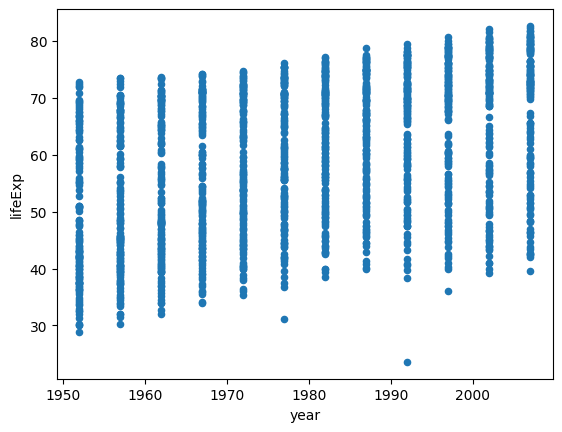

In [ ]:
# Excercise 1

ax1 = data.plot.scatter(x='year', y='lifeExp')

Question 1: The above plot is a scatter plot of life expectancy versus years. According to the above plot, there is a general (linearly) increasing trend in life expectancy over time.

<Axes: xlabel='year', ylabel='lifeExp'>

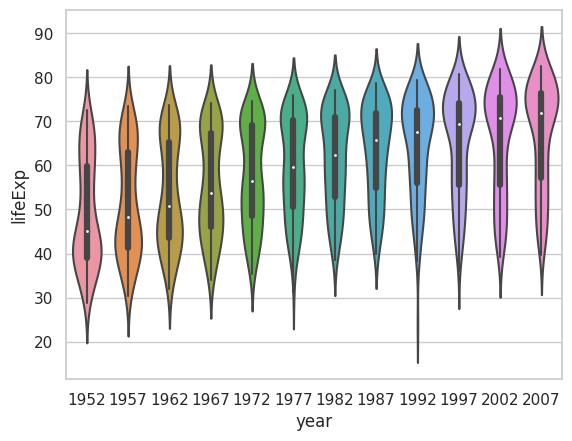

In [ ]:
# Creating Violin Plot
import seaborn
    
seaborn.set(style = 'whitegrid')
    
seaborn.violinplot(x ="year",
             y ="lifeExp",
             data = data)

Question 2: The above plot is a violin plot of life expectancy versus years where the "width" of the plot is the distribution of the y-axis. The distribution of life expectancy across countries over the years seems to be skewed towards the bottom of the "violin" in earlier years and trends towards the top of the "violin" as time goes on.

Question 3: I would reject the null hypothesis of no relationship because, by inspection of the above violin graph, the median life expectancy increases as the years increase. So there is a positive correlation.

Question 4: The violin plot of residuals from the linear model in question 3 vs year would have violins with negative medians in earlier years (because the violins are "wider" towards bottom, so [actual] - [expected] will have more negatives), violins with medians near 0 around 1970-1980 (because violins are "wider" towards top and bottom (normally distributed)), and violins with positive medians in later years (because violins are "wider" towards top so [actual] - [expected] will be positive).

Question 5: According to the assumptions of the linear regression model, the violin plot of residuals should be symmetrical and centered around zero. This shows that the residuals are normally distributed. Moreover, the "width" of the violin plots should be almost constant throughout. Based on this, the Question 3 model does not fit the general assumptions (the residuals are skewed).

In [ ]:
# Excercise 2
# Create a linear regression of life expectation versus year
from sklearn import linear_model
model = linear_model.LinearRegression()
from sklearn.model_selection import train_test_split
import numpy as np
x= np.array(data['year']).reshape(-1,1)
y= data['lifeExp']

X_train, X_test, y_train, y_test= train_test_split(x,y, test_size= 0.2, random_state= 7)
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)
reg.coef_

array([0.32478238])

In [ ]:
# Question 6 
# Fitting the data using ordinary least squares
import statsmodels.formula.api

fit = statsmodels.formula.api.ols(formula="y ~ x", data= data).fit()
print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.190
Model:                            OLS   Adj. R-squared:                  0.189
Method:                 Least Squares   F-statistic:                     398.6
Date:                Sat, 29 Apr 2023   Prob (F-statistic):           7.55e-80
Time:                        01:57:31   Log-Likelihood:                -6597.9
No. Observations:                1704   AIC:                         1.320e+04
Df Residuals:                    1702   BIC:                         1.321e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -585.6522     32.314    -18.124      0.0

Question 6: According to the above table (x's coefficient), on average, life expectancy increases by 0.3259 years every year around the world.

Question 7: I do reject the null hypothesis of no relationship because the p-value is 0 (or at least very close to 0), which tells us that there is a signigicant relationship between life expectancy and time (years).

<Axes: xlabel='year', ylabel='lifeExp'>

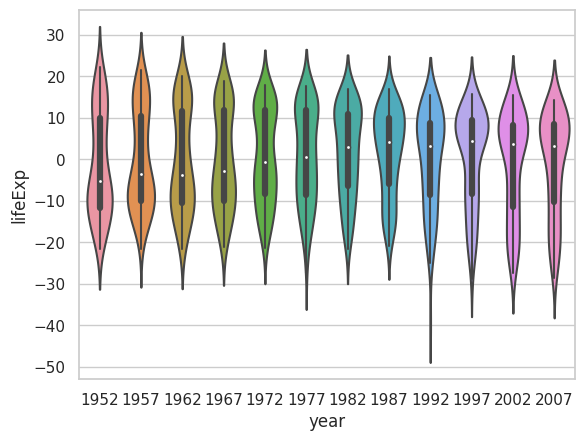

In [ ]:
# Excercise 3
# Create violin plot of residuals
residuals= y_train - reg.predict(X_train)

seaborn.set(style = 'whitegrid')
    
seaborn.violinplot(y = residuals , x= 'year', data=data)

Question 8: The above plot is a violin plot of life expectancy versus years. The plot of Excercise 3 matches my expectations from Question 4 because the violins in earlier years have negative medians, the violins in the middle (1970 - 1980) have medians near 0, and the violins in later years have posotive medians.

<Axes: xlabel='continent', ylabel='lifeExp'>

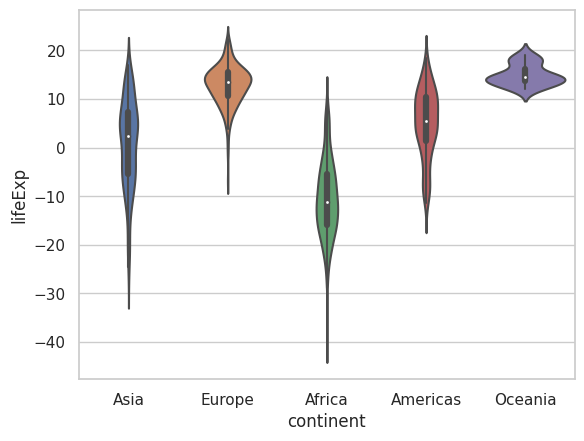

In [ ]:
# Excercise 4
# Create violin plot of residuals versus continents
seaborn.set(style = 'whitegrid')

seaborn.violinplot(y = residuals , x= 'continent', data=data)

Question 9: The model residual is lowest with widest range in Africa and gets narrower range and higher average life expectancy in order of Asia, Americas, Europe, and finally Oceania. If we do a regression analysis for each continent of life expectancy across time, the Africa and Asia should have a faster increase in life expectancy over time that Europe and Oceania which started with a higher average and expect to increase slower.

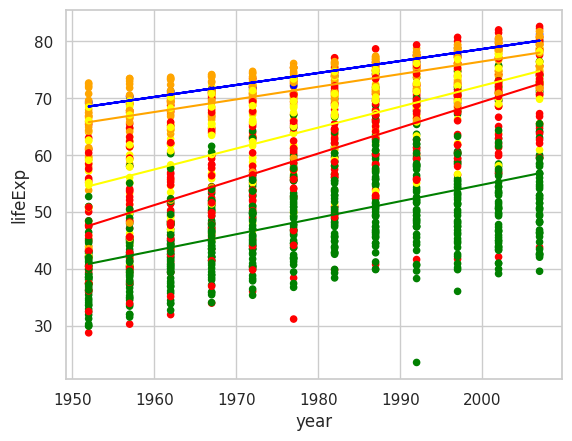

In [ ]:
# Excercise 5
# Create a scatter plot of life expantacy versus year for each continent and add
# a linear regression line for each scatter plot

import matplotlib.pyplot as plt

# Red -> Asia, Orange -> Europe, Yellow -> Americas, Green -> Africa
# Blue -> Ocenia
Asia= []
Europe= []
Americas= []
Africa= []
Ocenia= []
colorcat= []
ml = [0,0,0,0,0]

for x, row in data.iterrows():
  if (data.at[x,'continent'] == "Asia"):
    colorcat.append('red')
    Asia.append([data.at[x,'year'] , data.at[x,'lifeExp']])
  else:
    if data.at[x,'continent'] == "Europe":
      colorcat.append('orange')
      Europe.append([data.at[x,'year'] , data.at[x,'lifeExp']])
    else:
      if data.at[x,'continent'] == "Americas":
        colorcat.append('yellow')
        Americas.append([data.at[x,'year'] , data.at[x,'lifeExp']])
      else:
        if data.at[x,'continent'] == "Africa":
          colorcat.append('green')
          Africa.append([data.at[x,'year'] , data.at[x,'lifeExp']])
        else:
            colorcat.append('blue')
            Ocenia.append([data.at[x,'year'] , data.at[x,'lifeExp']])

ax = data.plot.scatter(x='year', y='lifeExp', c= colorcat)
Asia= np.transpose(Asia)
Americas= np.transpose(Americas)
Africa= np.transpose(Africa)
Europe= np.transpose(Europe)
Ocenia= np.transpose(Ocenia)

x= Asia[0]
y= Asia[1]
m, b = np.polyfit(x, y, 1)
ml[0] = m
plt.plot(x, m*x+b, c='red')


x= Americas[0]
y= Americas[1]
m, b = np.polyfit(x, y, 1)
ml[1] = m
plt.plot(x, m*x+b, c='yellow')

x= Europe[0]
y= Europe[1]
m, b = np.polyfit(x, y, 1)
ml[2] = m
plt.plot(x, (m*x)+b, c='orange')

x= Africa[0]
y= Africa[1]
m, b = np.polyfit(x, y, 1)
ml[3] = m
plt.plot(x, m*x+b, c='green')

x = Ocenia[0]
y= Ocenia[1]
m, b = np.polyfit(x, y, 1)
ml[4] = m
plt.plot(x, m*x+b, c='blue')

Question 10: The above plot is a scatter plot with regression lines where red is Asia, yellow is Americas, green is Africas, blue is Ocenia, and orange is Europe. Based on this plot, the regression model should include an interaction term for continent and year because each continent has a postiive correlation for life expectation and year.

In [ ]:
# Exercise 6
# Include an extra term for an interaction between continent and year
import statsmodels.api as sm
import statsmodels.formula.api as smf 

x6 = data[['year','continent']]
y6 = data['lifeExp']
x6 = sm.add_constant(x6)

rslt = smf.ols(formula='lifeExp ~ year + continent', data = data).fit()
rslt.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                lifeExp   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     722.1
Date:                Sat, 29 Apr 2023   Prob (F-statistic):               0.00
Time:                        01:57:33   Log-Likelihood:                -5806.0
No. Observations:                1704   AIC:                         1.162e+04
Df Residuals:                    1698   BIC:                         1.166e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              -596.2613     20.328    -29.332      0.000    -636.132    -556.390
continent[T.Americas]    15.7934      0.514     30.726      0.000      14.785      16.802
continent[T.Asia]        11.1996      0.470     23.827      0.000      10.278      12.122
continent[T.Europe]      23.0384      0.484     47.579      0.000      22.089      23.988
continent[T.Oceania]     25.4609      1.522     16.730      0.000      22.476      28.446
year                      0.3259      0.010     31.739      0.000       0.306       0.346
==============================================================================
Omnibus:                       22.804   Durbin-Watson:                   0.254
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.170
Skew:                          -0.207   Prob(JB):                     1.26e-06
Kurtosis:                       3.460   Cond. No.                     2.27e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.27e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Question 11: All the parameters in the model are statistically significant, different from zero.


In [ ]:
# Question 12
print("Average Increase per year")
print("Asia: " + str(ml[0]))
print("Americas: " + str(ml[1]))
print("Europe: " +  str(ml[2]))
print("Africa: " +  str(ml[3]))
print("Ocenia: " +  str(ml[4]))


Average Increase per year
Asia: 0.45312240389913017
Americas: 0.3676509370629368
Europe: 0.22193214452214455
Africa: 0.2895292630446486
Ocenia: 0.2102723776223778


In [ ]:
# Exercise 7
# Using an F-test to comapre how well the two models fit
A = np.identity(len(fit.params))
A = A[1:,:]

print(fit.f_test(A))

B = np.identity(len(rslt.params))
B = B[1:,:]

rslt.f_test(B)

<F test: F=398.6047457117502, p=7.546794625634771e-80, df_denom=1.7e+03, df_num=1>


<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=722.133990219669, p=0.0, df_denom=1.7e+03, df_num=5>

Question 13: The two variable interaction seems to be a much better fit based on the F value of 722 compared to 399 with the single covariate of year.

<Axes: xlabel='year'>

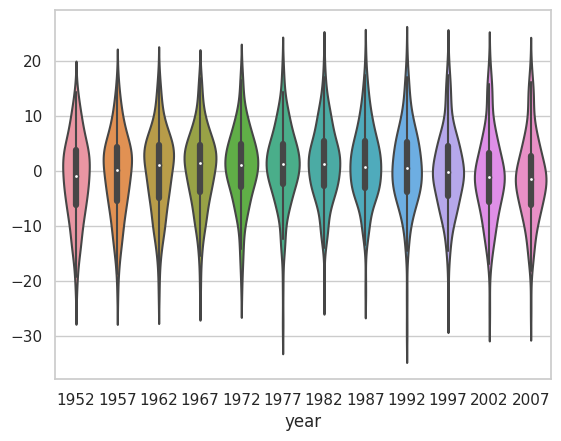

In [ ]:
# Exercise 8
# Making a residuals vs year
residuals= y6 - rslt.predict(x6)
seaborn.violinplot(y = residuals , x= 'year',formula='lifeExp ~ year', data = data)

The above residuals vs. year plot for the interaction model fits the general assumptions of the linear regression model. All the medians are close to zero and each violin plot is normally distributed in "width".

<Axes: >

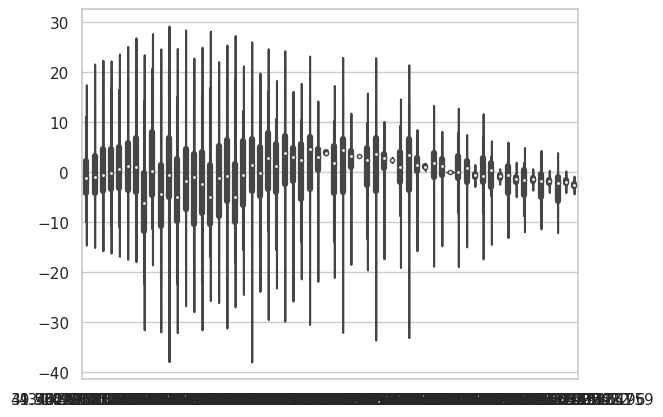

In [ ]:
# Making a residual vs fitted value model

seaborn.violinplot(y = residuals , x= rslt.predict(x6) , data = data)

Residuals vs fitted model does not meet the linear regression assumptions because the distribution of the y-axis is not even across the x-axis.